# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their bank loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default. 

- NT is the abbreviation for New Taiwain. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked in your pair.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

## 1. Data Cleaning

In [2]:
df = pd.read_csv('training_data.csv' , index_col=0)

In [3]:
df.Y.value_counts()

0                             17471
1                              5028
default payment next month        1
Name: Y, dtype: int64

In [4]:
# Split data to be used in the models
# Create matrix of features
X = df.drop('Y', axis = 1) # grabs everything else but 'Survived'


# Create target variable
y = df['Y'] # y is the column we're trying to predict

In [5]:
df['X3'].value_counts()

2            10516
1             7919
3             3713
5              208
4               90
6               42
0               11
EDUCATION        1
Name: X3, dtype: int64

In [6]:
X.isna().any().sum()

0

In [7]:
y.isna().any().sum()

0

In [8]:
X.dtypes

X1     object
X2     object
X3     object
X4     object
X5     object
X6     object
X7     object
X8     object
X9     object
X10    object
X11    object
X12    object
X13    object
X14    object
X15    object
X16    object
X17    object
X18    object
X19    object
X20    object
X21    object
X22    object
X23    object
dtype: object

In [9]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
28835,220000,2,1,2,36,0,0,0,0,0,...,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,...,326,326,326,326,326,326,326,326,326,326
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,0,0,0,0,0,...,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500
6239,10000,1,2,2,27,0,0,0,0,0,...,4878,5444,2639,2697,2000,1100,600,300,300,1000


In [10]:
X.X2.value_counts()

2      13572
1       8927
SEX        1
Name: X2, dtype: int64

In [11]:
X[X['X2'] == 'SEX' ].values
X.columns=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
        'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
        'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
        'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
        'PAY_AMT6']

In [12]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
28835,220000,2,1,2,36,0,0,0,0,0,...,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,...,326,326,326,326,326,326,326,326,326,326
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,0,0,0,0,0,...,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500
6239,10000,1,2,2,27,0,0,0,0,0,...,4878,5444,2639,2697,2000,1100,600,300,300,1000


In [13]:
y=X[X['SEX']=='SEX'].index

In [14]:
X.drop(axis=0,labels=y,inplace=True)

In [15]:
X=X.apply(lambda x:x.astype('float'))

In [16]:
X.dtypes

LIMIT_BAL    float64
SEX          float64
EDUCATION    float64
MARRIAGE     float64
AGE          float64
PAY_0        float64
PAY_2        float64
PAY_3        float64
PAY_4        float64
PAY_5        float64
PAY_6        float64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
dtype: object

In [17]:
X.SEX=np.where(X.SEX==1,1,0)

In [18]:
X.SEX.value_counts()

0    13572
1     8927
Name: SEX, dtype: int64

In [19]:
conds=[X.EDUCATION==4,X.EDUCATION==5,X.EDUCATION==6,X.EDUCATION==1,X.EDUCATION==3]
choices=[0,0,0,3,1]
X.EDUCATION=np.select(conds,choices,default=X.EDUCATION)

In [20]:
X.MARRIAGE=np.where(X.MARRIAGE==3,0,X.MARRIAGE)

In [21]:
X.MARRIAGE.value_counts()

2.0    12026
1.0    10195
0.0      278
Name: MARRIAGE, dtype: int64

In [22]:
X.AGE.value_counts()

29.0    1243
27.0    1100
28.0    1064
30.0    1026
26.0     959
25.0     904
31.0     902
32.0     878
33.0     874
34.0     859
24.0     851
35.0     841
36.0     812
37.0     799
38.0     720
39.0     703
23.0     690
40.0     656
41.0     613
42.0     597
44.0     512
43.0     495
45.0     462
46.0     421
22.0     420
47.0     340
48.0     339
49.0     326
50.0     298
51.0     269
53.0     241
52.0     236
54.0     184
55.0     154
56.0     147
57.0      89
58.0      89
59.0      62
60.0      56
21.0      56
61.0      45
62.0      32
64.0      24
63.0      24
66.0      21
65.0      17
67.0      13
69.0      10
70.0      10
68.0       5
73.0       3
72.0       3
75.0       2
71.0       2
74.0       1
Name: AGE, dtype: int64

In [23]:
Y=df['Y']

In [24]:
Y.value_counts()

0                             17471
1                              5028
default payment next month        1
Name: Y, dtype: int64

In [25]:
X.loc[(X.PAY_2==-1) & (X.PAY_3==0),['PAY_2','PAY_3','BILL_AMT2','PAY_AMT2','BILL_AMT3','PAY_AMT3']]

,PAY_2,PAY_3,BILL_AMT2,PAY_AMT2,BILL_AMT3,PAY_AMT3
20823,-1.0,0.0,87920.0,19406.0,17991.0,102989.0
23301,-1.0,0.0,3121.0,39774.0,44092.0,43325.0
16190,-1.0,0.0,157205.0,10056.0,91091.0,10000.0
20999,-1.0,0.0,89691.0,3935.0,91517.0,3759.0
27895,-1.0,0.0,151691.0,6502.0,143248.0,4333.0
...,...,...,...,...,...,...
29440,-1.0,0.0,734.0,1044.0,1580.0,1000.0
18372,-1.0,0.0,66470.0,2451.0,66187.0,2543.0
28363,-1.0,0.0,5939.0,2624.0,6624.0,3004.0
11168,-1.0,0.0,18180.0,1500.0,3463.0,3000.0


In [26]:
X.shape

(22499, 23)

In [27]:
X.PAY_0.value_counts()

 0.0    11057
-1.0     4272
 1.0     2750
-2.0     2048
 2.0     2032
 3.0      239
 4.0       51
 5.0       20
 8.0       15
 6.0        9
 7.0        6
Name: PAY_0, dtype: int64

In [28]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

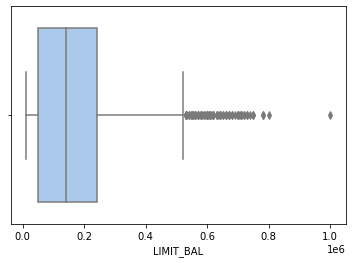

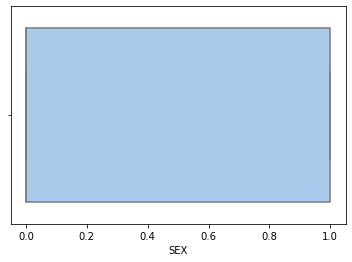

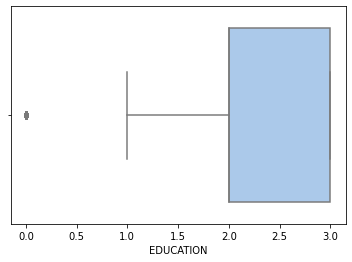

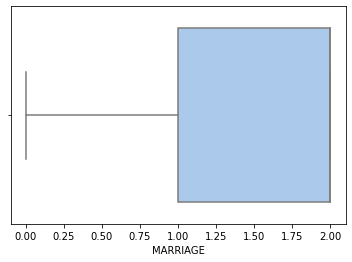

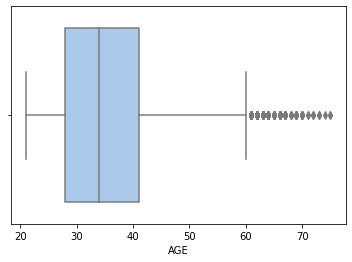

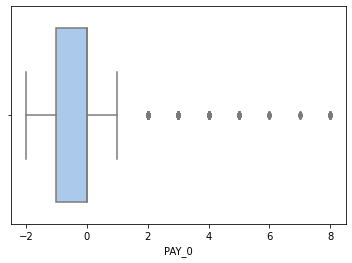

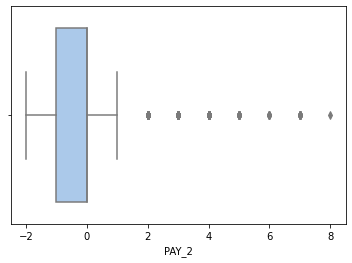

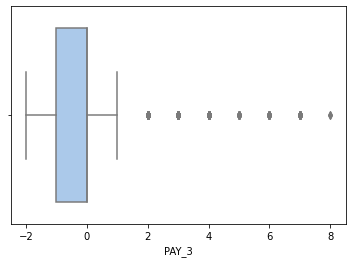

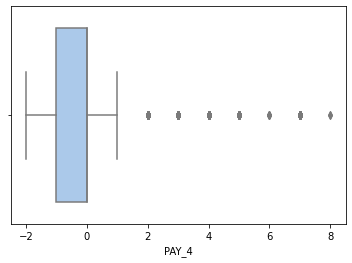

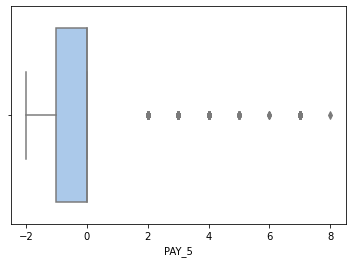

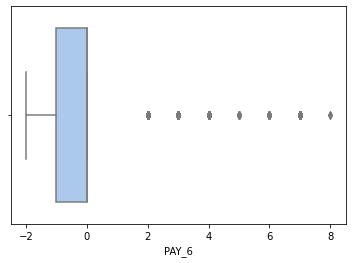

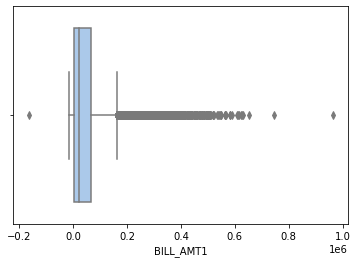

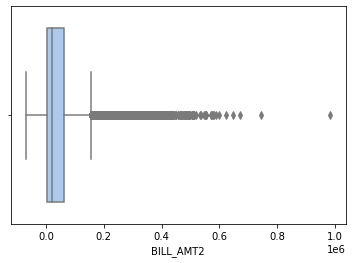

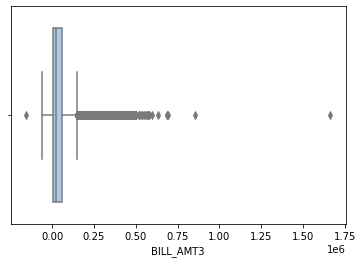

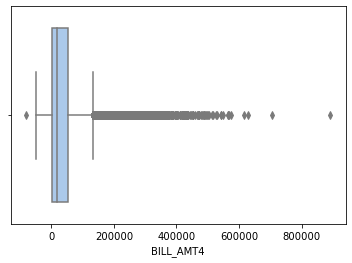

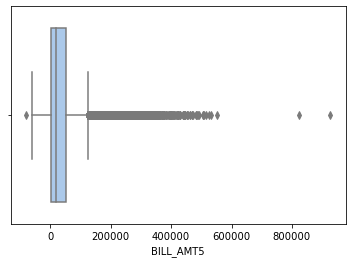

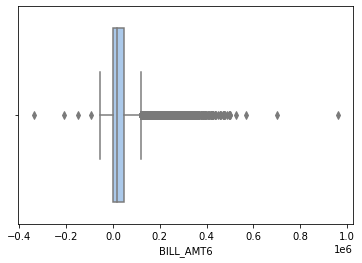

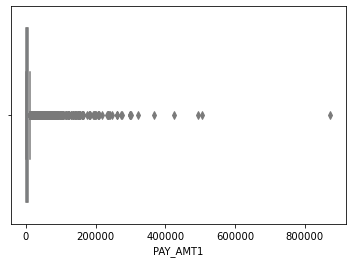

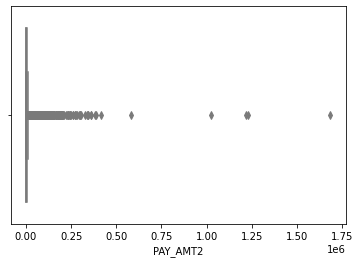

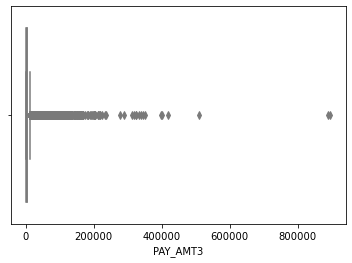

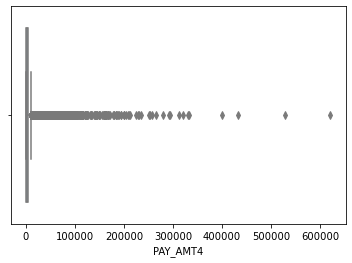

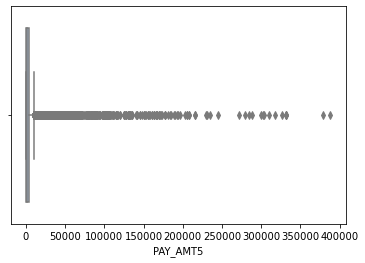

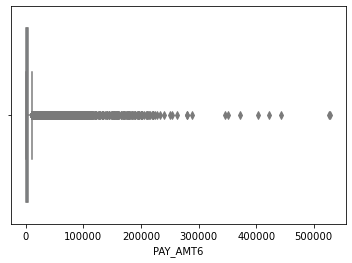

In [29]:
import seaborn as sns
for col in X.columns:
    sns.boxplot(x=X[col],palette='pastel')
    plt.show()

In [30]:
pd.set_option('display.max_columns', 100)
X[X.BILL_AMT3>800000]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
25732,80000.0,0,1.0,1.0,37.0,0.0,0.0,-2.0,-2.0,-2.0,-1.0,47751.0,-215.0,855086.0,632.0,632.0,124542.0,215.0,1024516.0,632.0,632.0,124542.0,14770.0
5297,500000.0,0,3.0,1.0,33.0,-2.0,-2.0,-1.0,-1.0,-2.0,-1.0,125.0,-18088.0,1664089.0,121757.0,97115.0,377217.0,4366.0,1684259.0,121831.0,97670.0,379267.0,26759.0


## 2. EDA

In [31]:
#sns.pairplot(X)

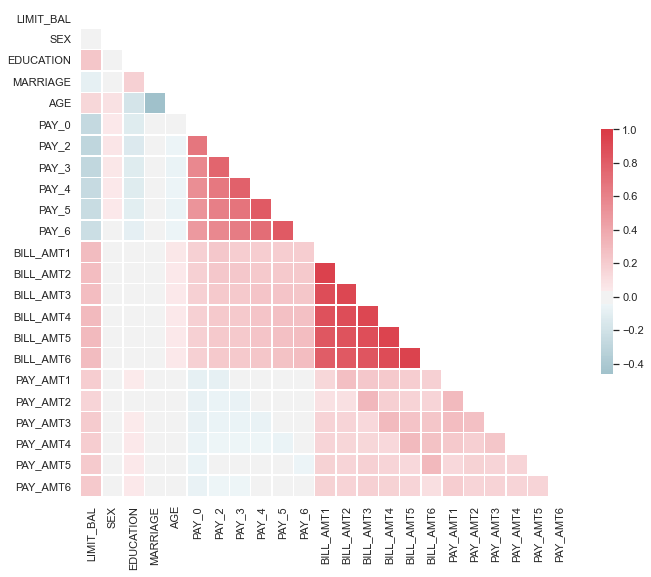

In [32]:
sns.set(style="white")
# Compute the correlation matrix
corr = X.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [33]:
X.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,-0.021080,0.235655,-0.074567,0.146964,-0.265951,-0.291882,-0.280722,-0.260983,-0.244000,-0.228850,0.295659,0.288841,0.288696,0.299262,0.299236,0.294636,0.196075,0.165682,0.211372,0.199648,0.216146,0.224594
SEX,-0.021080,1.000000,0.014108,0.028922,0.093937,0.055309,0.065135,0.060850,0.054413,0.049838,0.038452,0.037009,0.032141,0.025418,0.020942,0.016267,0.016368,-0.004579,0.000655,0.006248,-0.000075,-0.000469,0.001997
EDUCATION,0.235655,0.014108,1.000000,0.182534,-0.180827,-0.114701,-0.132742,-0.122839,-0.118417,-0.103403,-0.090248,-0.012231,-0.007064,-0.003234,0.009284,0.015593,0.016725,0.041572,0.032531,0.044643,0.047210,0.046910,0.046576
MARRIAGE,-0.074567,0.028922,0.182534,1.000000,-0.462771,0.005405,0.015744,0.024910,0.027380,0.033577,0.026316,-0.021008,-0.017120,-0.018502,-0.012496,-0.012230,-0.010530,-0.007186,-0.013012,-0.006624,-0.010904,-0.005524,0.000515
AGE,0.146964,0.093937,-0.180827,-0.462771,1.000000,-0.032549,-0.045748,-0.054225,-0.047994,-0.053844,-0.046720,0.058995,0.056343,0.055082,0.052860,0.051109,0.048705,0.026827,0.019959,0.030200,0.018125,0.023779,0.019674
PAY_0,-0.265951,0.055309,-0.114701,0.005405,-0.032549,1.000000,0.671159,0.572739,0.538345,0.510631,0.477583,0.186982,0.188355,0.179142,0.178962,0.181735,0.177287,-0.082487,-0.068540,-0.068790,-0.060425,-0.059418,-0.063257
PAY_2,-0.291882,0.065135,-0.132742,0.015744,-0.045748,0.671159,1.000000,0.765691,0.660958,0.621214,0.573809,0.231604,0.231139,0.221101,0.220565,0.221136,0.218439,-0.081038,-0.057079,-0.053981,-0.043681,-0.036044,-0.042905
PAY_3,-0.280722,0.060850,-0.122839,0.024910,-0.054225,0.572739,0.765691,1.000000,0.778805,0.684434,0.631855,0.203261,0.230221,0.222191,0.222899,0.221647,0.217789,-0.004954,-0.064132,-0.053470,-0.044234,-0.038854,-0.040017
PAY_4,-0.260983,0.054413,-0.118417,0.027380,-0.047994,0.538345,0.660958,0.778805,1.000000,0.819092,0.720739,0.200126,0.222057,0.241753,0.244126,0.242805,0.238121,-0.012978,-0.003251,-0.067676,-0.042180,-0.034109,-0.029826
PAY_5,-0.244000,0.049838,-0.103403,0.033577,-0.053844,0.510631,0.621214,0.684434,0.819092,1.000000,0.818435,0.205467,0.224577,0.241101,0.269734,0.269920,0.261551,-0.007966,-0.004002,0.006254,-0.054622,-0.033975,-0.026139


In [34]:
corrs=[]
for col in X.columns:
    try:
        corr=Y.corr(X[col])
    except TypeError:
        pass
    finally:
        corrs.append(corr)

In [35]:
X['SEX'].head()

28835    0
25329    0
18894    0
690      1
6239     1
Name: SEX, dtype: int64

In [36]:
drop=Y.loc[Y=='default payment next month'].index
Y=Y.drop(axis=0,labels=drop).astype('float')

In [37]:
Y.head()

28835    1.0
25329    0.0
18894    0.0
690      0.0
6239     1.0
Name: Y, dtype: float64

In [38]:
corrs_dict={}
for col in X.columns:
    corr=Y.corr(X[col])
    corrs_dict[corr]=col

In [39]:
sorted(corrs_dict.items(),reverse=True)

[(0.32477197918852785, 'PAY_0'),
 (0.26680996369146887, 'PAY_2'),
 (0.241575383754451, 'PAY_3'),
 (0.2191431610315649, 'PAY_4'),
 (0.20822856513405041, 'PAY_5'),
 (0.19348499515199535, 'PAY_6'),
 (0.03795265426902416, 'SEX'),
 (0.01458572173480351, 'AGE'),
 (-0.0055062686639029985, 'BILL_AMT6'),
 (-0.007186665088273208, 'BILL_AMT5'),
 (-0.009667022795648416, 'BILL_AMT4'),
 (-0.011761849138372261, 'BILL_AMT2'),
 (-0.01257793917627566, 'BILL_AMT3'),
 (-0.016857855050444518, 'BILL_AMT1'),
 (-0.025754348329082206, 'MARRIAGE'),
 (-0.03738372410703435, 'EDUCATION'),
 (-0.05405320523929013, 'PAY_AMT3'),
 (-0.054175764877981196, 'PAY_AMT5'),
 (-0.05453985841212806, 'PAY_AMT4'),
 (-0.055296158192308015, 'PAY_AMT6'),
 (-0.05763542969121722, 'PAY_AMT2'),
 (-0.0714687451062021, 'PAY_AMT1'),
 (-0.15595838634025444, 'LIMIT_BAL')]

## 3. Feature Engineering

# Polynomial and Interaction Feature Engineering

In [40]:
X.shape

(22499, 23)

In [41]:
#Polynomial
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(X)
poly_columns = poly.get_feature_names(X.columns)
X_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [42]:
X_poly.shape

(22499, 299)

In [43]:
X_poly.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5',
       ...
       'PAY_AMT3^2', 'PAY_AMT3 PAY_AMT4', 'PAY_AMT3 PAY_AMT5',
       'PAY_AMT3 PAY_AMT6', 'PAY_AMT4^2', 'PAY_AMT4 PAY_AMT5',
       'PAY_AMT4 PAY_AMT6', 'PAY_AMT5^2', 'PAY_AMT5 PAY_AMT6', 'PAY_AMT6^2'],
      dtype='object', length=299)

In [44]:
X['LIM_PAY_ratio_1']=(X['LIMIT_BAL']- X['PAY_AMT1'])/X['LIMIT_BAL']
X['LIM_PAY_ratio_2']=(X['LIMIT_BAL']- X['PAY_AMT2'])/X['LIMIT_BAL']
X['LIM_PAY_ratio_3']=(X['LIMIT_BAL']- X['PAY_AMT3'])/X['LIMIT_BAL']
X['LIM_PAY_ratio_4']=(X['LIMIT_BAL']- X['PAY_AMT4'])/X['LIMIT_BAL']
X['LIM_PAY_ratio_5']=(X['LIMIT_BAL']- X['PAY_AMT5'])/X['LIMIT_BAL']
X['LIM_PAY_ratio_6']=(X['LIMIT_BAL']- X['PAY_AMT6'])/X['LIMIT_BAL']

In [45]:
X['LIM_BILL_ratio_1']=(X['LIMIT_BAL']- X['BILL_AMT1'])/X['LIMIT_BAL']
X['LIM_BILL_ratio_2']=(X['LIMIT_BAL']- X['BILL_AMT2'])/X['LIMIT_BAL']
X['LIM_BILL_ratio_3']=(X['LIMIT_BAL']- X['BILL_AMT3'])/X['LIMIT_BAL']
X['LIM_BILL_ratio_4']=(X['LIMIT_BAL']- X['BILL_AMT4'])/X['LIMIT_BAL']
X['LIM_BILL_ratio_5']=(X['LIMIT_BAL']- X['BILL_AMT5'])/X['LIMIT_BAL']
X['LIM_BILL_ratio_6']=(X['LIMIT_BAL']- X['BILL_AMT6'])/X['LIMIT_BAL']

In [46]:
X['LIM_BILL_ratio_1'].describe()

count    22499.000000
mean         0.575276
std          0.412895
min         -5.455300
25%          0.170197
50%          0.683589
75%          0.977502
max          1.551933
Name: LIM_BILL_ratio_1, dtype: float64

In [47]:
X.shape

(22499, 35)

In [48]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,LIM_PAY_ratio_1,LIM_PAY_ratio_2,LIM_PAY_ratio_3,LIM_PAY_ratio_4,LIM_PAY_ratio_5,LIM_PAY_ratio_6,LIM_BILL_ratio_1,LIM_BILL_ratio_2,LIM_BILL_ratio_3,LIM_BILL_ratio_4,LIM_BILL_ratio_5,LIM_BILL_ratio_6
28835,220000.0,0,3.0,2.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,222598.0,222168.0,217900.0,221193.0,181859.0,184605.0,10000.0,8018.0,10121.0,6006.0,10987.0,143779.0,0.954545,0.963555,0.953995,0.97270,0.950059,0.346459,-0.011809,-0.009855,0.009545,-0.005423,0.173368,0.160886
25329,200000.0,0,1.0,2.0,29.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,0.998370,0.998370,0.998370,0.99837,0.998370,0.998370,0.998370,0.998370,0.998370,0.998370,0.998370,0.998370
18894,180000.0,0,3.0,2.0,27.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
690,80000.0,1,2.0,2.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,51372.0,51872.0,47593.0,43882.0,42256.0,42527.0,1853.0,1700.0,1522.0,1548.0,1488.0,1500.0,0.976838,0.978750,0.980975,0.98065,0.981400,0.981250,0.357850,0.351600,0.405087,0.451475,0.471800,0.468413
6239,10000.0,1,2.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,8257.0,7995.0,4878.0,5444.0,2639.0,2697.0,2000.0,1100.0,600.0,300.0,300.0,1000.0,0.800000,0.890000,0.940000,0.97000,0.970000,0.900000,0.174300,0.200500,0.512200,0.455600,0.736100,0.730300


In [49]:
X.isna().any().sum()

0

In [50]:
Y.shape

(22499,)

In [51]:
Y.isna().any().sum()

0

## 4. Feature Selection

In [52]:
Y.shape

(22499,)

In [53]:
X.shape

(22499, 35)

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.25,random_state=1)

## Logistic Regression

In [55]:
lr_test=LogisticRegression(class_weight='balanced',random_state=1)

In [56]:
params={'penalty':['l1','l2',None],'C':[.01,.1,.5,1],'solver':['liblinear','saga'],
       'max_iter':[100,250,500],'l1_ratio':[.01,.1,.25,.5,1]}

In [57]:
lr_test_grid=GridSearchCV(lr_test,param_grid=params,scoring='f1',n_jobs=-1,cv=3,verbose=1)

In [58]:
lr_test_grid.fit(X_train,y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  5.1min finished
/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "


GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=1),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'l1_ratio': [0.01, 0.1, 0.25, 0.5, 1],
                         'max_iter': [100, 250, 500],
                         'penalty': ['l1', 'l2', None],
                         'solver': ['liblinear', 'saga']},
             scoring='f1', verbose=1)

In [59]:
lr_test_grid.best_score_

0.4868465126350696

In [60]:
lr_test_grid.best_estimator_

LogisticRegression(C=0.5, class_weight='balanced', l1_ratio=0.01, penalty='l1',
                   random_state=1, solver='liblinear')

In [61]:
y_preds=lr_test_grid.best_estimator_.predict(X_test)
test_f1=metrics.f1_score(y_test,y_preds)
test_f1

0.4833689350015258

## Random Forest

In [62]:
RF_clf=RandomForestClassifier(class_weight='balanced')

In [63]:
params_rf={'n_estimators':[100,250,500],'criterion':['gini','entropy'],
           'max_depth':[1,3,5,7],'min_samples_leaf':[1,3,5],'max_leaf_nodes':[10,15,20]}

In [64]:
grid_forest=GridSearchCV(RF_clf,params_rf,scoring='f1',cv=3,verbose=1,n_jobs=-1)

In [65]:
grid_forest.fit(X_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed: 10.0min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7],
                         'max_leaf_nodes': [10, 15, 20],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [100, 250, 500]},
             scoring='f1', verbose=1)

In [66]:
grid_forest.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_leaf_nodes=20, n_estimators=500)

In [67]:
grid_forest.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 1,
 'n_estimators': 500}

In [68]:
grid_forest.best_score_

0.5422346658486606

In [69]:
y_preds=grid_forest.best_estimator_.predict(X_test)
f1_score=metrics.f1_score(y_test,y_preds)

In [70]:
f1_score

0.5336289726533628

## KNN

In [71]:
knn=KNeighborsClassifier()
params_t={'n_neighbors':range(1,11)}

In [72]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [73]:
knn_grid=GridSearchCV(knn,params_t,cv=3,verbose=1,n_jobs=-1,scoring='f1')

In [74]:
knn_grid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.2s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 11)}, scoring='f1', verbose=1)

In [75]:
knn_grid.best_params_

{'n_neighbors': 1}

In [76]:
knn_grid.best_score_

0.292197634421655

In [77]:
y_pred_knn=knn_grid.best_estimator_.predict(X_test)

In [78]:
knn_f1=metrics.f1_score(y_test,y_pred_knn)
knn_f1

0.31038599283724627

## XGBoost in progress 

In [79]:
import xgboost as xgb

In [80]:
xgb_clf=clf = xgb.XGBClassifier(random_state=1)
params={'max_depth':[1,3,5,7],'learning_rate':[.01,.1,.5,1], 'max_delta_step':[1,3,5,7],
       'booster':['dart','gbtree','gblinear']}

In [81]:
xgb_grid=GridSearchCV(xgb_clf,params,cv=3,verbose=1,n_jobs=-1)

In [82]:
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  8.0min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=1,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [83]:
xgb_grid.best_score_

0.8189522259101207

In [84]:
test_pred=xgb_grid.best_estimator_.predict(X_test)

In [85]:
xgb_grid.best_params_

{'booster': 'dart', 'learning_rate': 0.1, 'max_delta_step': 3, 'max_depth': 3}

In [86]:
f1_xgb_test=metrics.f1_score(y_test,test_pred)
f1_xgb_test

0.49229188078108943

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

## Decision Tree

In [87]:
dt_clf=DecisionTreeClassifier(class_weight='balanced')
params_dt={'criterion':['gini','entropy'],'max_depth':[2,3,5,6,7],
           'max_features':[2,4,5],'min_samples_leaf':[1,2,4,6]}

In [88]:
dt_grid=GridSearchCV(dt_clf,params_dt,cv=3,verbose=1,n_jobs=-1,scoring='f1')

In [89]:
dt_grid.fit(X_train,y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    5.0s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 6, 7],
                         'max_features': [2, 4, 5],
                         'min_samples_leaf': [1, 2, 4, 6]},
             scoring='f1', verbose=1)

In [90]:
dt_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 5,
 'min_samples_leaf': 4}

In [91]:
dt_grid.best_score_

0.5086315370104588

In [92]:
y_pred_dt=dt_grid.best_estimator_.predict(X_test)
f1_dt=metrics.f1_score(y_test,y_pred_dt)

In [93]:
f1_dt

0.5123546511627907

## Voting Classifier

In [94]:
lr=lr_test_grid.best_estimator_
rf=grid_forest.best_estimator_
knn=knn_grid.best_estimator_
dt=dt_grid.best_estimator_
xgb=xgb_grid.best_estimator_

In [103]:
voting_clf=VotingClassifier(estimators=[('logreg',lr),('randomforest',rf),
                           ('decisiontree',dt)],voting='hard')

In [104]:
voting_clf.fit(X_train,y_train)

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "


VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=0.5, class_weight='balanced',
                                                 l1_ratio=0.01, penalty='l1',
                                                 random_state=1,
                                                 solver='liblinear')),
                             ('randomforest',
                              RandomForestClassifier(class_weight='balanced',
                                                     criterion='entropy',
                                                     max_depth=3,
                                                     max_leaf_nodes=20,
                                                     n_estimators=500)),
                             ('decisiontree',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     criterion='entropy',
                                                     max_d

In [105]:
train_pred=voting_clf.predict(X_train)
test_pred=voting_clf.predict(X_test)

In [106]:
f1_score_train=metrics.f1_score(y_train,train_pred)
f1_score_test=metrics.f1_score(y_test,test_pred)

In [107]:
print(f1_score_train,f1_score_test)

0.5419555343055223 0.5323275862068965


## Bagging Model

In [108]:
bc_lr=BaggingClassifier(VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=0.5, class_weight='balanced',
                                                 l1_ratio=0.01, penalty='l1',
                                                 random_state=1,
                                                 solver='liblinear')),
                             ('randomforest',
                              RandomForestClassifier(class_weight='balanced',
                                                     criterion='entropy',
                                                     max_depth=3,
                                                     max_leaf_nodes=20,
                                                     n_estimators=500)),
                             ('decisiontree',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     criterion='entropy',
                                                     max_depth=7,
                                                     max_features=5,
                                                     min_samples_leaf=4))])
                        ,oob_score=True,random_state=1)

In [109]:
bc_lr.fit(X_train, y_train)

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used wh

BaggingClassifier(base_estimator=VotingClassifier(estimators=[('logreg',
                                                               LogisticRegression(C=0.5,
                                                                                  class_weight='balanced',
                                                                                  l1_ratio=0.01,
                                                                                  penalty='l1',
                                                                                  random_state=1,
                                                                                  solver='liblinear')),
                                                              ('randomforest',
                                                               RandomForestClassifier(class_weight='balanced',
                                                                                      criterion='entropy',
                                       

In [110]:
bc_lr.oob_score_

0.7753940974279957

In [111]:
bc_lr_preds=bc_lr.predict(X_test)
bc_lr_f1_test=metrics.f1_score(y_test,bc_lr_preds)

In [112]:
bc_lr_f1_test

0.5394006659267481

## 6. Model Evaluation

## 7. Final Model